In [2]:
from boundmixofgaussians import findpeak, compute_sum, compute_grad
import numpy as np
np.set_printoptions(suppress=True,precision=6)
import matplotlib.pyplot as plt
%matplotlib inline
from GPAdversarialBound import getallchanges, zeromean_gaussian, getbound, AdversBound, compute_bounds
from GPAdversarialDatasets import getMNISTexample

# from GPAdversarialBound.test import testing
# testing()

In [3]:
trainingN = 100
testN = 200
fullX,Y = getMNISTexample(scalingfactor=4,Ntraining=trainingN+testN,splitfiveormore=False) #4
keep = np.max(fullX,0)>50 #150
X = fullX[:,keep]
X=X-np.min(X,0)
X=X/np.max(X,0)
X = X*1.0
Y = Y*1.0
Y[Y==0]=-1
Xtest = X[trainingN:,:]
Ytest = Y[trainingN:,:]
Xtrain = X[0:trainingN,:]
Ytrain = Y[0:trainingN,:]

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters sparse_gp.rbf.variance


0.7


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 5., 7., 2., 0., 0., 0.,
        0., 0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]),
 <a list of 19 Patch objects>)

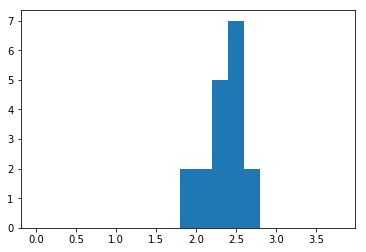

In [4]:
results, _, _, accuracy = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1, 4, 1.0, 0.5, 0.0001,2)
print(accuracy)
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2))

reconstraining parameters gp_classification.rbf.variance


0.68


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 3., 9., 3.,
        0., 0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]),
 <a list of 19 Patch objects>)

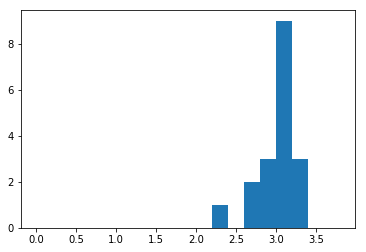

In [5]:
results, _, _, accuracy = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1,False, 1.0, 0.5, 0.0001,2)
print(accuracy)
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2))